## My computer's hardware confuiguration is not sufficient to train the yolo model, that's why I have come to google colab

In [1]:
# installing ultralytics
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.8/486.8 KB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 KB 23.2 MB/s eta 0:00:00


In [2]:
import torch
torch.__version__

'1.13.1+cu116'

#### sometimes whe

In [3]:
# installing ultralytics sometimes installs cpu version of pytorch
# so lets install cuda version 
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu116


**Remaining cells will be same as our local training notebook**

We will follow the same data folder structure as local
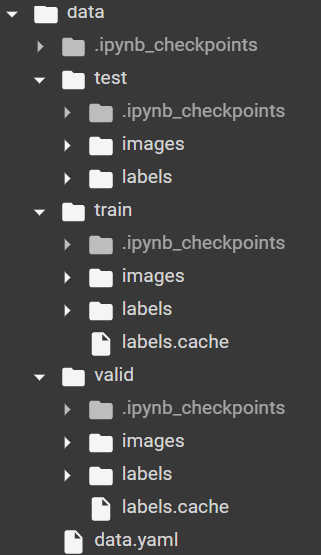

In [4]:
from ultralytics import YOLO
import torch

In [5]:
torch.__version__

'1.13.1+cu116'

In [6]:
torch.cuda.is_available()

True

In [8]:
model = YOLO("yolov8n-seg.pt")

  0%|          | 0.00/6.73M [00:00<?, ?B/s]

In [9]:
model._check_is_pytorch_model()

In [15]:
data_yaml_path = "/content/data/data.yaml"

inside data.yaml
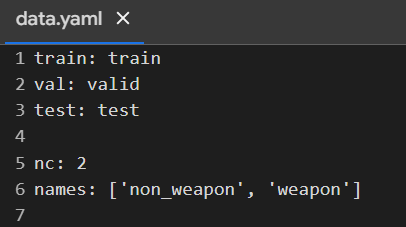

In [1]:
# this is for the reference during actual traing, we will use only those which are needed

# model.train(data = path_to_yaml,
#             epochs=100,
#             patience=50, # early stopping if no improvement observed
#             batch=16, # batch size
#             imgsz=640, # image size 
#             save=True, # save traing check points and predict results
#             save_period=-1, # Save checkpoint every x epochs (disabled if < 1)
#             cache=False, # True/ram, disk or False. Use cache for data loading
#             device=null, # device to run on, i.e. cuda device=0 or device=0,1,2,3 or device=cpu
#             workers=8, # number of parallel threads
#             project=null, # project name
#             name=null, # experiment name
#             exist_ok=False, # whether to overwrite existing experiment
#             pretrained=False, # whether to use a pretrained model
#             optimizer='SGD', # optimizer to use, choice=['SGD', 'Adam', 'AdamW', 'RMSProp']
#             verbose=False, # print stuffs during training
#             seed=0, # seed
#             deterministic=False, # whether to enable deterministic mode
#            )

In [16]:
%%time
model.train(data = data_yaml_path, 
            epochs=100,
            imgsz=640,
            device=0
           )

Ultralytics YOLOv8.0.58 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/data/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=Fals

  0%|          | 0.00/755k [00:00<?, ?B/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.Conv                  [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.Conv                  [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.C2f                   [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.C2f                   [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

  0%|          | 0.00/6.23M [00:00<?, ?B/s]

AMP: checks passed ✅
optimizer: SGD(lr=0.01) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias
train: Scanning /content/data/train/labels... 39 images, 0 backgrounds, 0 corrupt: 100%|██████████| 39/39 [00:00<00:00, 347.42it/s]
train: New cache created: /content/data/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
val: Scanning /content/data/valid/labels... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<00:00, 353.86it/s]
val: New cache created: /content/data/valid/labels.cache
Plotting labels to runs/segment/train3/labels.jpg... 
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size
      1/100      2.81G     0.8105      2.539      3.225      

CPU times: user 1min 52s, sys: 36.3 s, total: 2min 28s
Wall time: 10min 53s


Now I will download the entire output from here